# Lab2 Logistic Regression

## 1 - Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

## 2 - Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

- You have historical data from previous applicants that you can use as a training set for logistic regression.
- For each training example, you have the applicant’s scores on two exams and the admissions decision.
- Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

# 3 - Dataset

You will start by loading the dataset for this task.

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train` .
  - `X_train` contains exam scores on two exams for a student.
  - `y_train` is the admission decision.
    - `y_train = 1` if the student was admitted.
    - `y_train = 0` if the student was not admitted.
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
# Load the dataset

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y


X_train, y_train = load_data('data1.txt')

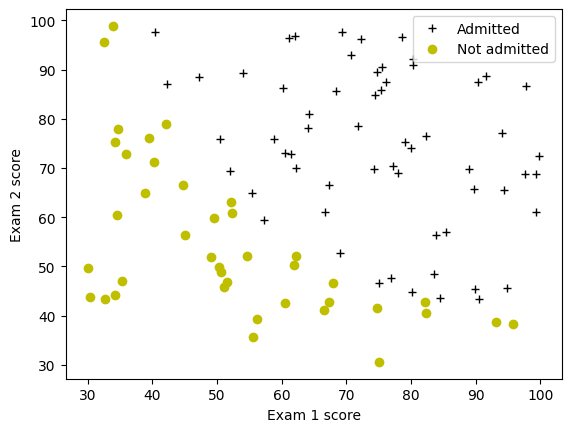

In [3]:
# Visualize the data

def plot_data(X, y, pos_label='y=1', neg_label='y=0'):
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


plot_data(X_train, y_train[:], pos_label='Admitted', neg_label='Not admitted')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc='upper right')
plt.show()

## 4 - Cost Function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(x, y, w, b, *argv):
    """
    Computes the cost over all examples.

    Args:
        x (ndarray Shape (m,n)): Data, m examples by n features
        y (ndarray Shape (m,)): Target value
        w (ndarray Shape (n,)): Values of parameters of the model
        b (scalar): Value of bias parameter of the model
        *argv: Unused, for compatibility with regularized version below

    Returns:
        total_cost (scalar): Cost
    """

    m = x.shape[0]

    total_cost = 0

    for i in range(m):
        total_cost += -y[i] * np.log(sigmoid(np.dot(x[i], w) + b)) - (1 - y[i]) * np.log(
            1 - sigmoid(np.dot(x[i], w) + b))

    total_cost /= m

    return total_cost

## 5 - Gradient Descent

In [5]:
def compute_gradient(x, y, w, b, *argv):
    """
    Computes the gradient for logistic regression.

    Args:
        x (ndarray Shape (m,n)): Data, m examples by n features
        y (ndarray Shape (m,)): Target value
        w (ndarray Shape (n,)): Values of parameters of the model
        b (scalar): Value of bias parameter of the model
        *argv: Unused, for compatibility with regularized version below

    Returns:
        dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    m, n = x.shape

    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        tmp = sigmoid(np.dot(x[i], w) + b) - y[i]
        dj_db += tmp
        for j in range(n):
            dj_dw[j] += tmp * x[i][j]

    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw

## 6 - Learning Parameters Using Gradient Descent

In [6]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha.

    Args:
        X (ndarray Shape (m, n): Data, m examples by n features
        y (ndarray Shape (m,)): Target value
        w_in (ndarray Shape (n,)): Initial values of parameters of the model
        b_in (scalar): Initial value of parameter of the model
        cost_function: Function to compute cost
        gradient_function: Function to compute gradient
        alpha (float): Learning rate
        num_iters (int): Number of iterations to run gradient descent
        lambda_ (scalar, float): Regularization constant

    Returns:
        w (ndarray Shape (n,)): Updated values of parameters of the model after running gradient descent
        b (scalar): Updated value of parameter of the model after running gradient descent
    """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f'Iteration {i:4}: Cost {float(J_history[-1]):8.2f}')

    return w_in, b_in, J_history, w_history

In [7]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w, b, J_history, _ = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                      iterations, 0)

Iteration    0: Cost     0.96
Iteration 1000: Cost     0.31
Iteration 2000: Cost     0.30
Iteration 3000: Cost     0.30
Iteration 4000: Cost     0.30
Iteration 5000: Cost     0.30
Iteration 6000: Cost     0.30
Iteration 7000: Cost     0.30
Iteration 8000: Cost     0.30
Iteration 9000: Cost     0.30
Iteration 9999: Cost     0.30


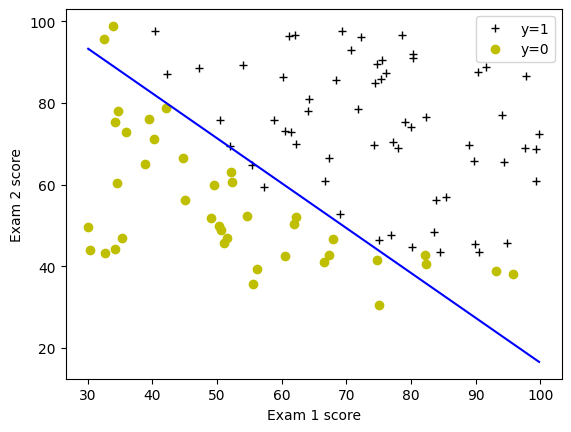

In [8]:
# Plot the decision boundary

def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j) * (X2 ** j)))
    return np.stack(out, axis=1)


def plot_decision_boundary(w, b, X, y):
    plot_data(X[:, 0:2], y)
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        plt.plot(plot_x, plot_y, c='b')
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)     
        z = z.T
        plt.contour(u, v, z, levels=[0.5], colors='g')


plot_decision_boundary(w, b, X_train, y_train)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc='upper right')
plt.show()

## 7 - Predict Function

In [9]:
def predict(x, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters w.

    Args:
        X (ndarray Shape (m,n)): Data, m examples by n features
        w (ndarray Shape (n,)): Values of parameters of the model
        b (scalar): Value of bias parameter of the model

    Returns:
        p (ndarray (m,)): The predictions for X using a threshold at 0.5
    """

    m = x.shape[0]
    p = np.zeros(m)

    for i in range(m):
        p[i] = sigmoid(np.dot(x[i], w) + b) >= 0.5

    return p

## 8 - Regularized Logistic Regression

In [10]:
# Load the dataset

X_train, y_train = load_data('data2.txt')

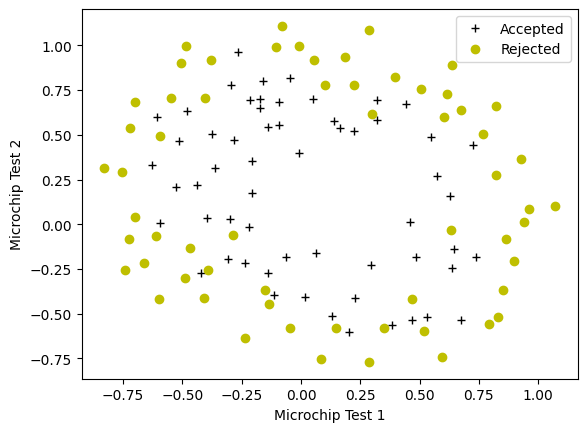

In [11]:
# Visualize the data

plot_data(X_train, y_train[:], pos_label='Accepted', neg_label='Rejected')
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc='upper right')
plt.show()

## 9 - Feature Mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature` , we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) =
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features has been transformed into a 27-dimensional vector.

## 10 - Cost Function for Regularized Logistic Regression

In [12]:
def compute_cost_reg(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples.

    Args:
        X (ndarray Shape (m,n)): Data, m examples by n features
        y (ndarray Shape (m,)): Target value
        w (ndarray Shape (n,)): Values of parameters of the model
        b (scalar): Value of bias parameter of the model
        lambda_ (scalar, float): Controls amount of regularization

    Returns:
        total_cost (scalar): Cost
    """

    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = 0.

    for i in range(n):
        reg_cost += w[i] ** 2

    reg_cost *= (lambda_ / (2 * m))
    total_cost = cost_without_reg + reg_cost

    return total_cost

## 11 - Gradient Descent for Regularized Logistic Regression

In [13]:
def compute_gradient_reg(X, y, w, b, lambda_=1):
    """
    Computes the gradient for logistic regression with regularization.

    Args:
        X (ndarray Shape (m,n)): Data, m examples by n features
        y (ndarray Shape (m,)): Target value
        w (ndarray Shape (n,)): Values of parameters of the model
        b (scalar): Value of bias parameter of the model
        lambda_ (scalar,float): Regularization constant

    Returns:
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
        dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w
    """

    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)

    for i in range(n):
        dj_dw[i] += w[i] * lambda_ / m

    return dj_db, dj_dw

## 12 - Learning Parameters Using Gradient Descent

In [16]:
# Initialize fitting parameters
np.random.seed(1)
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 1.

# Set regularization parameter lambda_
lambda_ = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w, b, J_history, _ = gradient_descent(X_mapped, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg,
                                      alpha, iterations, lambda_)

Iteration    0: Cost     0.72
Iteration 1000: Cost     0.59
Iteration 2000: Cost     0.56
Iteration 3000: Cost     0.53
Iteration 4000: Cost     0.51
Iteration 5000: Cost     0.50
Iteration 6000: Cost     0.48
Iteration 7000: Cost     0.47
Iteration 8000: Cost     0.46
Iteration 9000: Cost     0.45
Iteration 9999: Cost     0.45


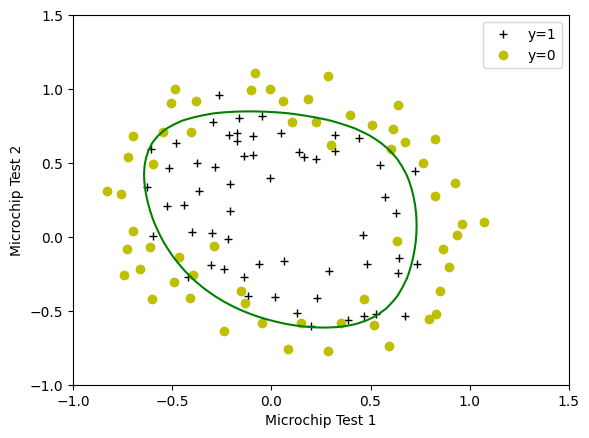

Train Accuracy: 82.203390


In [17]:
# Plot the decision boundary
plot_decision_boundary(w, b, X_mapped, y_train)
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc='upper right')
plt.show()

# Compute accuracy on the training set
p = predict(X_mapped, w, b)
print('Train Accuracy: %f' % (np.mean(p == y_train) * 100))